### 精度検証

In [4]:
from kineticEQ import BGK1DPlot

config_holo = {
    "solver": "implicit",
    "implicit_solver": "holo",
    "ho_iter": 64,
    "lo_iter": 64,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "tau_tilde": 5e-1,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_holo = BGK1DPlot(**config_holo)

--- auto compile ---
--- compile cuSOLVER ---
--- compile LO block-tridiag backend ---
--- LO block-tridiag backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: holo
  ho_iter: 64, ho_tol: 1e-06
  lo_iter: 64, lo_tol: 1e-06
 ---- hyperparameter ----
  hyperparameter: tau_tilde=0.5
 ---- space ----
  space: nx=64, dx=0.0159, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
No modifications detected for re-loaded extension module lo_blocktridiag, skipping build step...
Loading extension module lo_blocktridiag...
NoneType: None


In [5]:
sim_holo.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_holo.save_benchmark_results(filename="holo_benchmark")

--- Benchmark Start, benc_type: spatial ---
--- Run Benchmark Simulation (nx = 129) ---


Progress: 100%|██████████████████████████████████████████████████████| 100/100 [00:00<00:00, 113.04it/s]


--- Run Benchmark Simulation (nx = 257) ---


Progress: 100%|███████████████████████████████████████████████████████| 100/100 [00:01<00:00, 82.22it/s]


--- Run Benchmark Simulation (nx = 513) ---


Progress: 100%|███████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.85it/s]


--- Run Benchmark Simulation (nx = 1025) ---


Progress: 100%|███████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.49it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: holo_benchmark  (3.00 MB)


'holo_benchmark'

In [6]:
config_implicit = {
    "solver": "implicit",
    "implicit_solver": "backend",
    "picard_iter": 4096,
    "picard_tol": 1e-6,
    "tau_tilde": 5e-1,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_implicit = BGK1DPlot(**config_implicit)

--- auto compile ---
--- compile cuSOLVER ---
--- compile CUDA fused implicit backend ---
--- fused CUDA backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: backend
 ---- hyperparameter ----
  hyperparameter: tau_tilde=0.5
 ---- space ----
  space: nx=64, dx=0.0159, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
No modifications detected for re-loaded extension module implicit_fused, skipping build step...
Loading extension module implicit_fused...
NoneType: None


In [7]:
sim_implicit.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_implicit.save_benchmark_results(filename="implicit_benchmark")

--- Benchmark Start, benc_type: spatial ---
--- Run Benchmark Simulation (nx = 129) ---


Progress: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1557.27it/s]


--- Run Benchmark Simulation (nx = 257) ---


Progress: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1059.99it/s]


--- Run Benchmark Simulation (nx = 513) ---


Progress: 100%|██████████████████████████████████████████████████████| 100/100 [00:00<00:00, 631.46it/s]


--- Run Benchmark Simulation (nx = 1025) ---


Progress: 100%|██████████████████████████████████████████████████████| 100/100 [00:00<00:00, 538.65it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: implicit_benchmark  (3.00 MB)


'implicit_benchmark'

In [8]:
config_explicit = {
    "solver": "explicit",
    "explicit_solver": "backend",
    "tau_tilde": 5e-1,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-7,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_explicit = BGK1DPlot(**config_explicit)

--- auto compile ---
--- compile CUDA fused explicit backend ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module explicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- fused CUDA backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: explicit
 ---- hyperparameter ----
  hyperparameter: tau_tilde=0.5
 ---- space ----
  space: nx=64, dx=0.0159, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=100001, dt=0.0000, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module explicit_fused...
NoneType: None


In [9]:
sim_explicit.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_explicit.save_benchmark_results(filename="explicit_benchmark")

--- Benchmark Start, benc_type: spatial ---
--- Run Benchmark Simulation (nx = 129) ---


Progress: 100%|██████████████████████████████████████████████| 100000/100000 [00:05<00:00, 19096.39it/s]


--- Run Benchmark Simulation (nx = 257) ---


Progress: 100%|██████████████████████████████████████████████| 100000/100000 [00:07<00:00, 12973.22it/s]


--- Run Benchmark Simulation (nx = 513) ---


Progress: 100%|███████████████████████████████████████████████| 100000/100000 [00:12<00:00, 7711.47it/s]


--- Run Benchmark Simulation (nx = 1025) ---


Progress: 100%|███████████████████████████████████████████████| 100000/100000 [00:22<00:00, 4436.97it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: explicit_benchmark  (3.00 MB)


'explicit_benchmark'

ベンチマーク結果を読み込み: holo_benchmark  (meta: {'saved_at': '2025-11-25T13:52:24', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


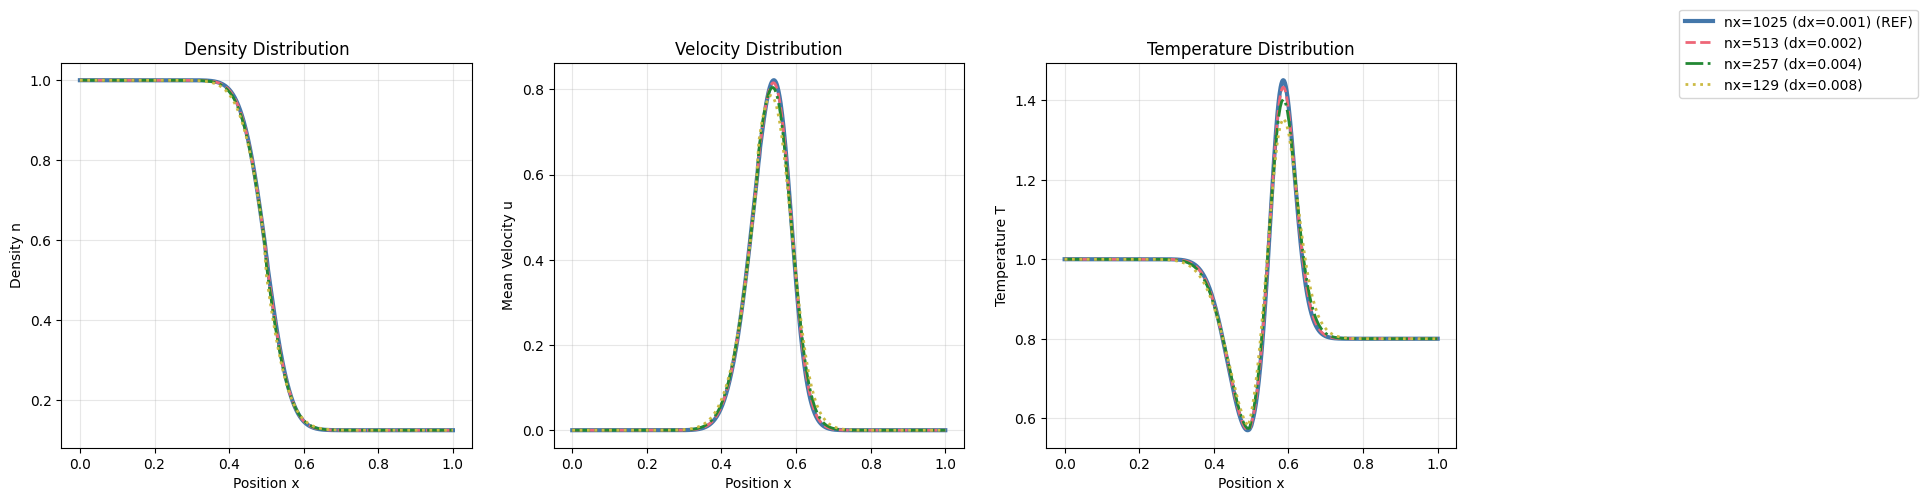

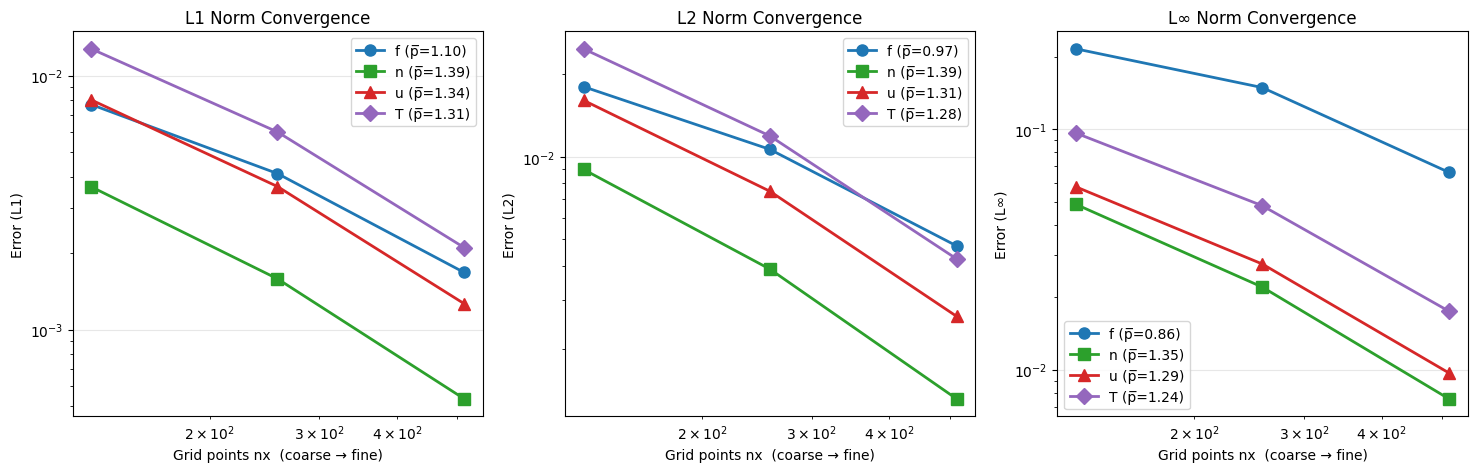

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.1026798730739156),
   'n': np.float64(1.3920239751527408),
   'u': np.float64(1.3381493704470953),
   'T': np.float64(1.3051007104078183)},
  'L2': {'f': np.float64(0.9668497770226185),
   'n': np.float64(1.39321031789093),
   'u': np.float64(1.3118107430145223),
   'T': np.float64(1.2758960025442365)},
  'Linf': {'f': np.float64(0.8569089105244893),
   'n': np.float64(1.3493557780717338),
   'u': np.float64(1.2911123674108216),
   'T': np.float64(1.2356371581536458)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [10]:
# 結果表示
tmp = sim_holo.load_benchmark_results("holo_benchmark")
err = sim_holo.compute_error(tmp)
sim_holo.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: implicit_benchmark  (meta: {'saved_at': '2025-11-25T13:52:25', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


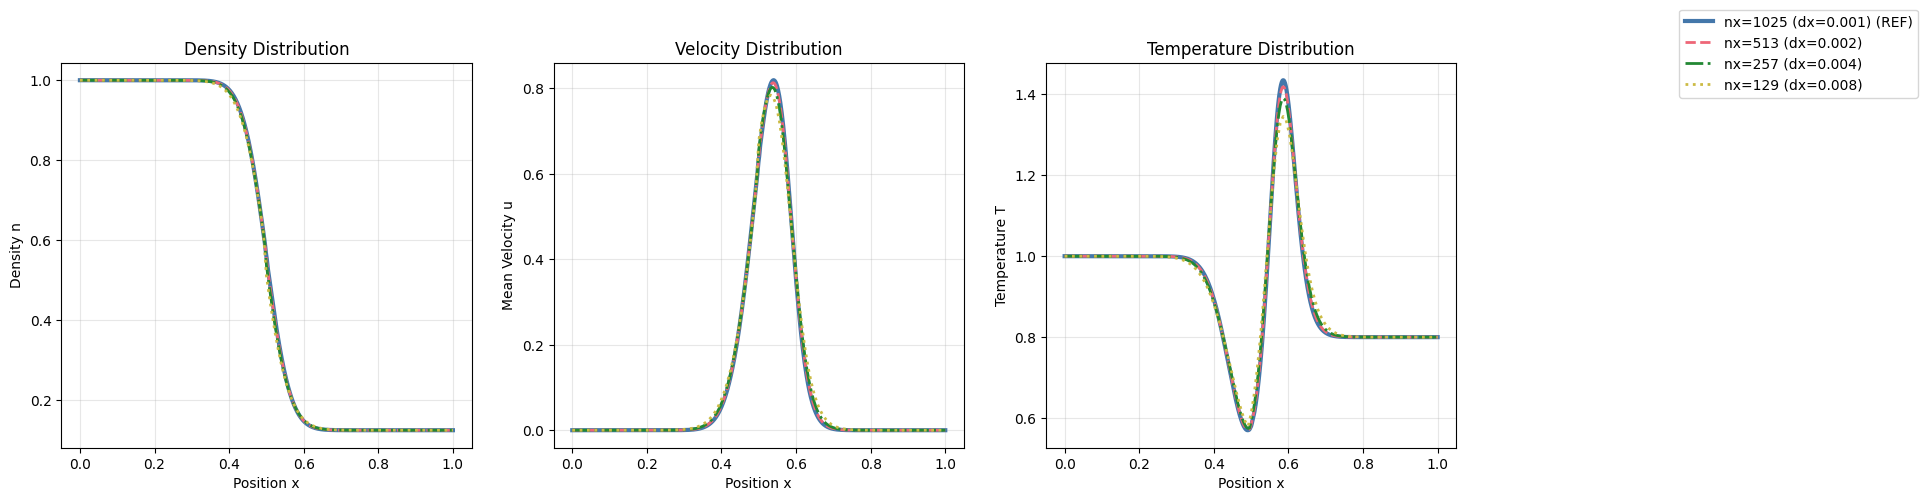

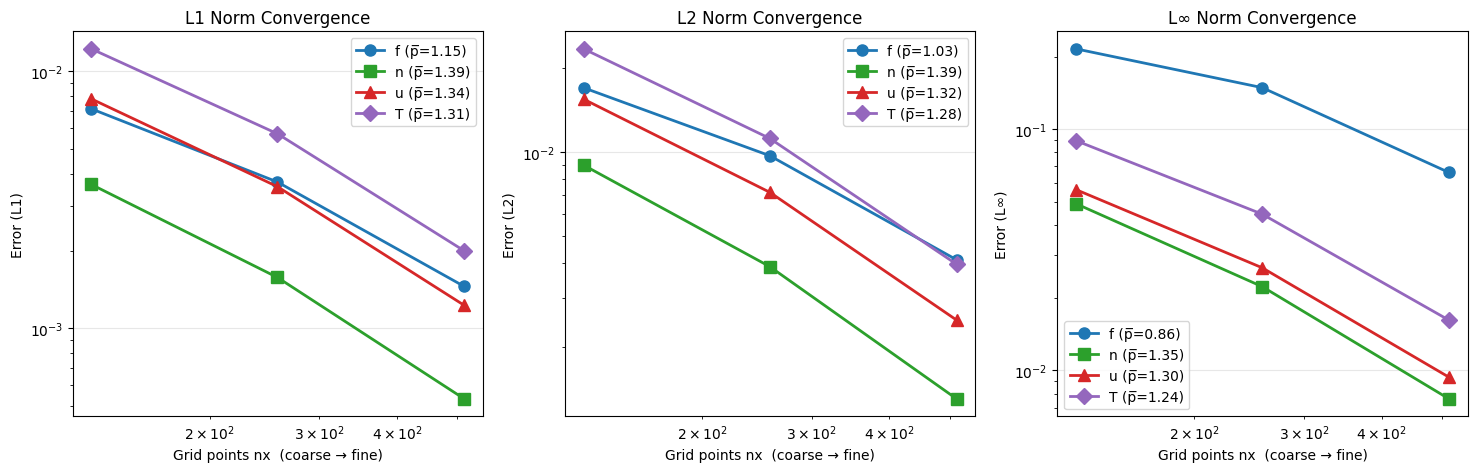

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.1541335211801704),
   'n': np.float64(1.392928874307065),
   'u': np.float64(1.3412496551334656),
   'T': np.float64(1.3122689471684323)},
  'L2': {'f': np.float64(1.0259515772568109),
   'n': np.float64(1.3938001639185056),
   'u': np.float64(1.3175353243916377),
   'T': np.float64(1.2846954868750673)},
  'Linf': {'f': np.float64(0.8551850370651126),
   'n': np.float64(1.3498281200830728),
   'u': np.float64(1.2973821127778076),
   'T': np.float64(1.2416431334426612)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [11]:
tmp = sim_implicit.load_benchmark_results(filename="implicit_benchmark")
err = sim_implicit.compute_error(tmp)
sim_implicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: explicit_benchmark  (meta: {'saved_at': '2025-11-25T13:53:13', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'explicit'})


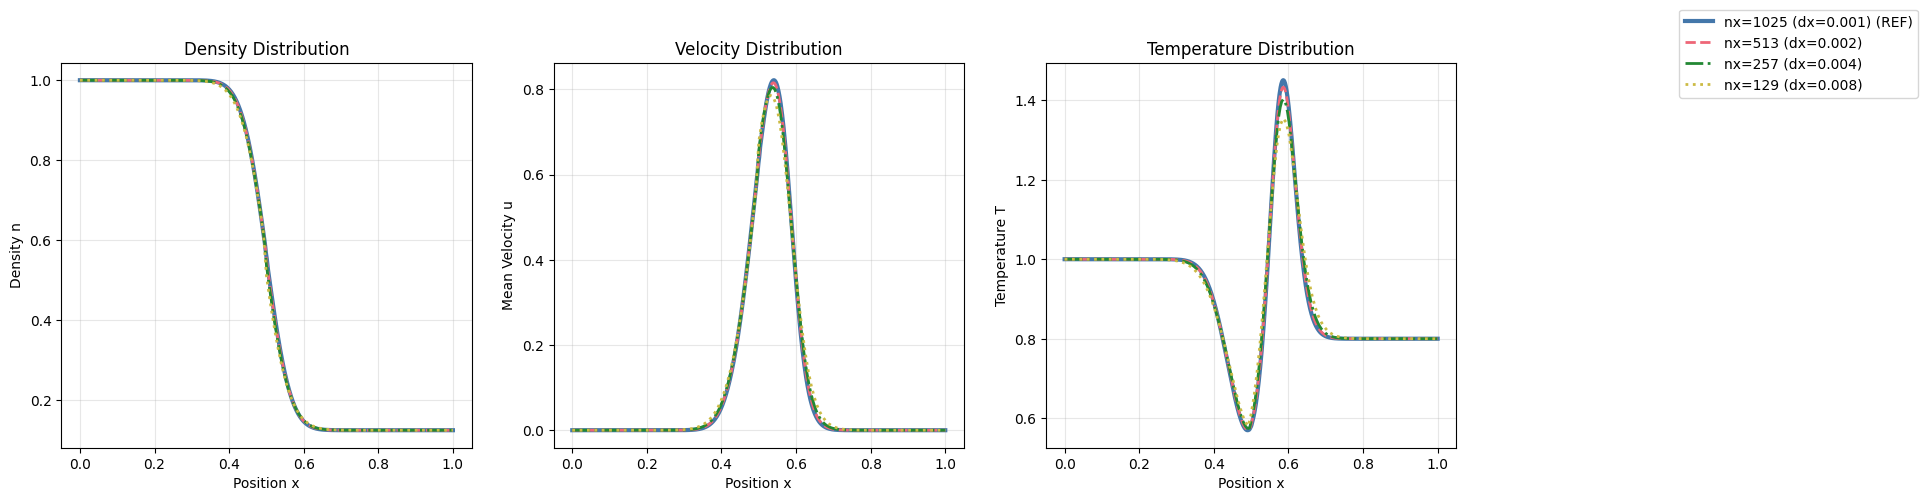

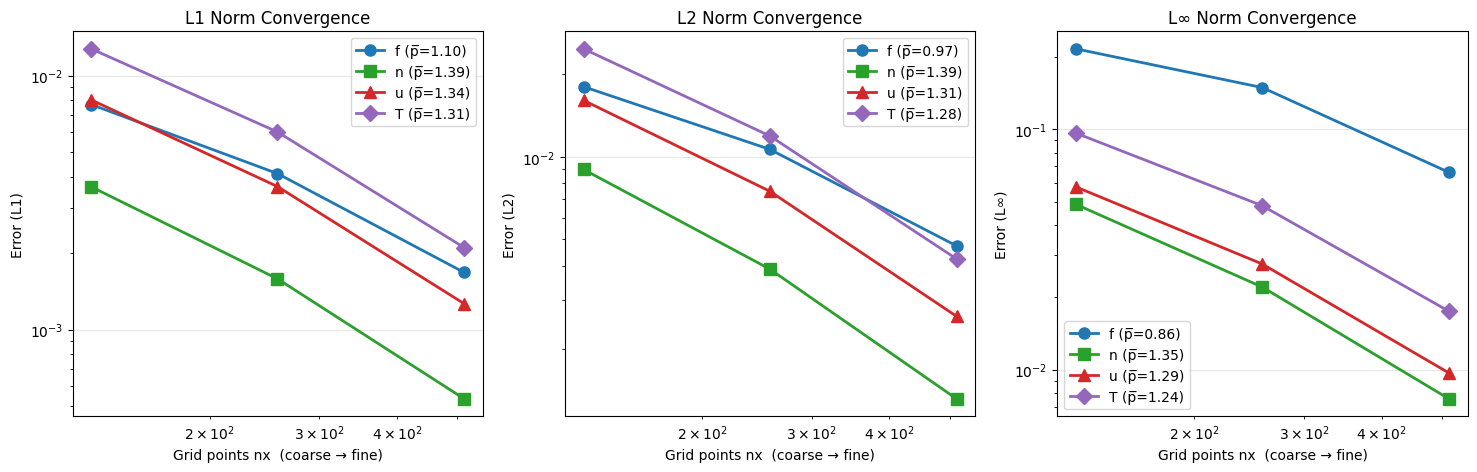

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.102647295957091),
   'n': np.float64(1.3919979272636196),
   'u': np.float64(1.338149695142723),
   'T': np.float64(1.3051745619049686)},
  'L2': {'f': np.float64(0.966884505348178),
   'n': np.float64(1.3931711665629274),
   'u': np.float64(1.3118382748128952),
   'T': np.float64(1.2759742727885877)},
  'Linf': {'f': np.float64(0.8568928822153515),
   'n': np.float64(1.3494098240713834),
   'u': np.float64(1.291194044025252),
   'T': np.float64(1.2357969288657586)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [12]:
tmp = sim_explicit.load_benchmark_results(filename="explicit_benchmark")
err = sim_explicit.compute_error(tmp)
sim_explicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)